In [51]:

from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import torch
from torch.utils.data import Dataset, DataLoader



import wfdb

In [2]:
file = open('./mit-bih-arrhythmia-database-1.0.0/RECORDS')
records = file.readlines()
file.close()

In [3]:
wfdb.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

In [4]:
good = ['N']
leftBundleBlocks = ['L']
rightBundleBlocks = ['R']
atrialContraction = ['A']
ventricularContraction = ['V']
paced = ['/']
ventricularEscape = ['E']
ventricularFlutterWave = ['!']

In [13]:
def segmentation(typeBeat):

    liste1,liste2 = [],[]

    for e in records:
        signals, fields = wfdb.rdsamp('./mit-bih-arrhythmia-database-1.0.0/' + e[0:-1]) 

        ann = wfdb.rdann('./mit-bih-arrhythmia-database-1.0.0/' + e[0:-1], 'atr')
       
        ids = np.in1d(ann.symbol, typeBeat)
        imp_beats = ann.sample[ids]
        beats = (ann.sample)
        for i in imp_beats:
            beats = list(beats)
            j = beats.index(i)
            if(j!=0 and j!=(len(beats)-1)):
                x = beats[j-1]
                y = beats[j+1]
                diff1 = abs(x - beats[j])//2
                diff2 = abs(y - beats[j])//2
                liste1.append(signals[beats[j] - diff1: beats[j] + diff2, 0])
                liste2.append(signals[beats[j] - diff1: beats[j] + diff2, 1])

    liste1 = liste1[1:] 
    liste2 = liste2[1:]
    return liste1,liste2

In [14]:
NORMAL = segmentation(good) 
LBB = segmentation(leftBundleBlocks)
RBB = segmentation(rightBundleBlocks)
APC = segmentation(atrialContraction)
PVC = segmentation(ventricularContraction)
VEB = segmentation(ventricularEscape)
PAB = segmentation(paced)
VFW = segmentation(ventricularFlutterWave)

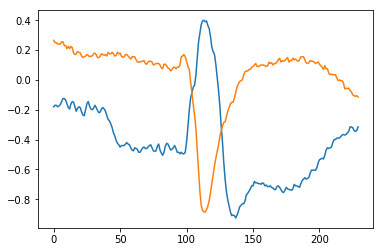

In [19]:

plt.plot(LBB[0][0])
plt.plot(LBB[1][0])



In [8]:
len(LBB)

8071

In [17]:
LBB[0]

[array([-0.18 , -0.17 , -0.17 , -0.18 , -0.175, -0.165, -0.145, -0.125,
        -0.125, -0.135, -0.16 , -0.185, -0.195, -0.16 , -0.145, -0.15 ,
        -0.18 , -0.21 , -0.19 , -0.18 , -0.185, -0.215, -0.235, -0.24 ,
        -0.2  , -0.16 , -0.145, -0.175, -0.195, -0.2  , -0.19 , -0.17 ,
        -0.185, -0.205, -0.22 , -0.215, -0.195, -0.185, -0.195, -0.21 ,
        -0.24 , -0.265, -0.275, -0.295, -0.32 , -0.355, -0.375, -0.405,
        -0.425, -0.435, -0.45 , -0.44 , -0.44 , -0.44 , -0.43 , -0.42 ,
        -0.43 , -0.435, -0.455, -0.47 , -0.475, -0.455, -0.46 , -0.465,
        -0.485, -0.485, -0.47 , -0.455, -0.45 , -0.46 , -0.46 , -0.45 ,
        -0.44 , -0.435, -0.455, -0.475, -0.48 , -0.475, -0.445, -0.43 ,
        -0.47 , -0.49 , -0.505, -0.485, -0.445, -0.425, -0.43 , -0.45 ,
        -0.47 , -0.465, -0.455, -0.44 , -0.46 , -0.485, -0.485, -0.495,
        -0.485, -0.495, -0.495, -0.485, -0.415, -0.315, -0.205, -0.125,
        -0.085, -0.05 , -0.035,  0.03 ,  0.14 ,  0.255,  0.315, 

In [25]:
NORMALnp = np.array(NORMAL)
LBBnp = np.array(LBB)
RBBnp = np.array(RBB)
APCnp = np.array(APC)
PVCnp = np.array(PVC)
VEBnp = np.array(VEB)
PABnp = np.array(PAB)
VFWnp = np.array(VFW)

In [21]:
NORMALnp


array([[array([-0.26 , -0.275, -0.28 , -0.29 , -0.275, -0.27 , -0.26 , -0.28 ,
       -0.28 , -0.285, -0.275, -0.275, -0.265, -0.27 , -0.285, -0.29 ,
       -0.28 , -0.275, -0.285, -0.28 , -0.3  , -0.3  , -0.305, -0.295,
       -0.3  , -0.31 , -0.31 , -0.305, -0.295, -0.285, -0.285, -0.29 ,
       -0.295, -0.31 , -0.29 , -0.295, -0.3  , -0.305, -0.31 , -0.325,
       -0.31 , -0.3  , -0.29 , -0.31 , -0.325, -0.33 , -0.315, -0.3  ,
       -0.305, -0.31 , -0.32 , -0.33 , -0.325, -0.315, -0.31 , -0.305,
       -0.305, -0.31 , -0.3  , -0.305, -0.29 , -0.3  , -0.3  , -0.305,
       -0.305, -0.29 , -0.28 , -0.295, -0.305, -0.315, -0.305, -0.295,
       -0.29 , -0.28 , -0.27 , -0.275, -0.275, -0.27 , -0.25 , -0.25 ,
       -0.255, -0.225, -0.22 , -0.205, -0.2  , -0.205, -0.215, -0.23 ,
       -0.22 , -0.225, -0.225, -0.225, -0.23 , -0.235, -0.24 , -0.235,
       -0.22 , -0.21 , -0.205, -0.245, -0.285, -0.285, -0.3  , -0.31 ,
       -0.33 , -0.33 , -0.325, -0.315, -0.32 , -0.315, -0.325, -0.34 

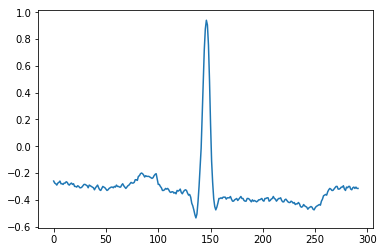

In [24]:
plt.plot(NORMALnp[0,0])

In [45]:
NORMALLabel = ['Normal']*len(NORMAL[0])
LBBLabel = ['LBB']*len(LBB[0])
RBBLabel = ['RBB']*len(RBB[0])
APCLabel = ['APC']*len(APC[0])
PVCLabel = ['PVC']*len(PVC[0])
VEBLabel = ['VEB']*len(VEB[0])
PABLabel = ['PAB']*len(PAB[0])
VFWLabel = ['VFW']*len(VFW[0])

Labels =np.array(NORMALLabel + LBBLabel + RBBLabel + APCLabel + PVCLabel + VEBLabel + PABLabel + VFWLabel)
Signals =  np.concatenate((NORMAL, LBB, RBB, APC, PVC, VEB, PAB, VFW),axis = 1)



In [48]:
len(Signals[0]) == len(Labels)

Signals[:,0]

array([array([-0.26 , -0.275, -0.28 , -0.29 , -0.275, -0.27 , -0.26 , -0.28 ,
       -0.28 , -0.285, -0.275, -0.275, -0.265, -0.27 , -0.285, -0.29 ,
       -0.28 , -0.275, -0.285, -0.28 , -0.3  , -0.3  , -0.305, -0.295,
       -0.3  , -0.31 , -0.31 , -0.305, -0.295, -0.285, -0.285, -0.29 ,
       -0.295, -0.31 , -0.29 , -0.295, -0.3  , -0.305, -0.31 , -0.325,
       -0.31 , -0.3  , -0.29 , -0.31 , -0.325, -0.33 , -0.315, -0.3  ,
       -0.305, -0.31 , -0.32 , -0.33 , -0.325, -0.315, -0.31 , -0.305,
       -0.305, -0.31 , -0.3  , -0.305, -0.29 , -0.3  , -0.3  , -0.305,
       -0.305, -0.29 , -0.28 , -0.295, -0.305, -0.315, -0.305, -0.295,
       -0.29 , -0.28 , -0.27 , -0.275, -0.275, -0.27 , -0.25 , -0.25 ,
       -0.255, -0.225, -0.22 , -0.205, -0.2  , -0.205, -0.215, -0.23 ,
       -0.22 , -0.225, -0.225, -0.225, -0.23 , -0.235, -0.24 , -0.235,
       -0.22 , -0.21 , -0.205, -0.245, -0.285, -0.285, -0.3  , -0.31 ,
       -0.33 , -0.33 , -0.325, -0.315, -0.32 , -0.315, -0.325, -0.34 ,

In [59]:
class ECGDataset(Dataset):

    def __init__(self, Dir):
        
        file = open(Dir+'RECORDS')
        records = file.readlines()
        file.close()
        
        good = ['N']
        leftBundleBlocks = ['L']
        rightBundleBlocks = ['R']
        atrialContraction = ['A']
        ventricularContraction = ['V']
        paced = ['/']
        ventricularEscape = ['E']
        ventricularFlutterWave = ['!']
        
        NORMAL = segmentation(good) 
        LBB = segmentation(leftBundleBlocks)
        RBB = segmentation(rightBundleBlocks)
        APC = segmentation(atrialContraction)
        PVC = segmentation(ventricularContraction)
        VEB = segmentation(ventricularEscape)
        PAB = segmentation(paced)
        VFW = segmentation(ventricularFlutterWave)
        
        
        NORMALLabel = ['Normal']*len(NORMAL[0])
        LBBLabel = ['LBB']*len(LBB[0])
        RBBLabel = ['RBB']*len(RBB[0])
        APCLabel = ['APC']*len(APC[0])
        PVCLabel = ['PVC']*len(PVC[0])
        VEBLabel = ['VEB']*len(VEB[0])
        PABLabel = ['PAB']*len(PAB[0])
        VFWLabel = ['VFW']*len(VFW[0])

        self.Labels =np.array(NORMALLabel + LBBLabel + RBBLabel + APCLabel + PVCLabel + VEBLabel + PABLabel + VFWLabel)
        self.Signals =  np.concatenate((NORMAL, LBB, RBB, APC, PVC, VEB, PAB, VFW),axis = 1)

        
        
        
        

    def __len__(self):
        return len(self.Labels[0])

    def __getitem__(self, idx):

        sample = {'Signals': self.Signals[:,idx], 'Label': self.Labels[idx]}

        return sample
    
    
    

In [60]:
DS = ECGDataset(Dir = './mit-bih-arrhythmia-database-1.0.0/')
sample = DS[0]

'Normal'

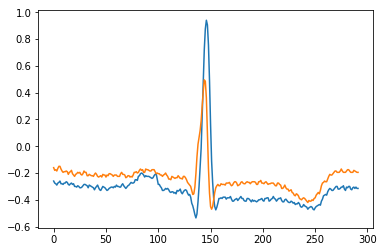

In [70]:
plt.plot(sample['Signals'][0])
plt.plot(sample['Signals'][1])
sample['Label']